# Dataset Information & EDA

In [1]:
#Library imports
import pandas as pd 
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.model_selection import train_test_split
# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
#imports for data cleaning
import string
import regex

In [2]:
df = pd.read_csv("/content/drive/MyDrive/mbti_1.csv")

In [3]:
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [4]:
df.info()
#no null values in column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [5]:
df.describe()

,type,posts
count,8675,8675
unique,16,8675
top,INFP,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
freq,1832,1


In [6]:
df.shape

(8675, 2)

In [7]:
df.nunique()

type       16
posts    8675
dtype: int64

In [8]:
df.type.value_counts()

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

In [9]:
df_EDA = df.copy()

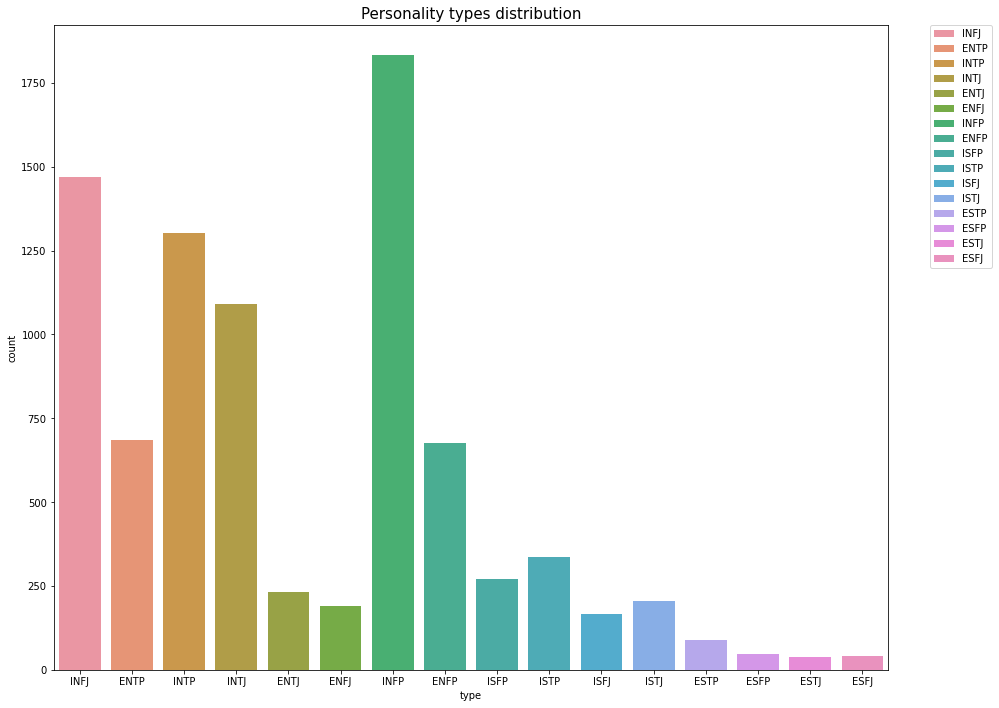

In [10]:
#sns countplot

plt.figure(figsize=(14,10))
sns.countplot(x='type',data=df_EDA,hue='type',dodge=False)  #dodge = False helped with plot issue
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)  #places the legend outside the figure
sns.set_context('talk')
sns.set_theme(style="darkgrid")
plt.title('Personality types distribution', fontsize=15)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/MBTI/Plots/countplotTypecount.jpg')
plt.show()

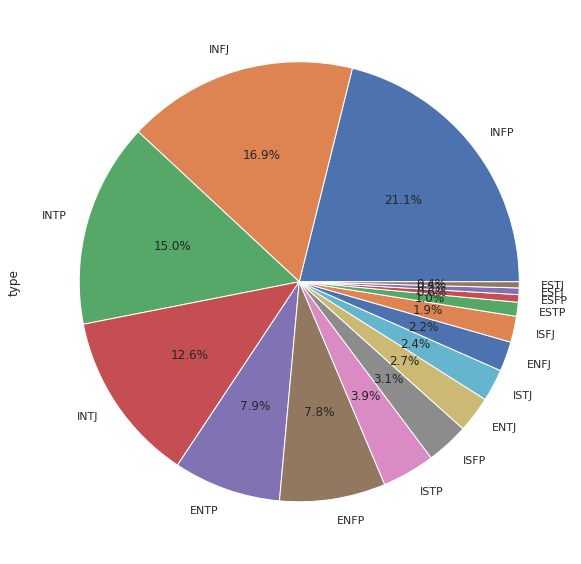

In [11]:
#pie chart
((df_EDA.type.value_counts()/df_EDA.type.value_counts().sum())*100).plot.pie(y = df_EDA.type,autopct='%1.1f%%',figsize = (14,8))
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/MBTI/Plots/pieplotOfTypePercentage.jpg')

In [12]:
#creating 4 new columns as we will be working on 4 different axis ---
# 1)Extrovert(E)/Introvert(I)
# 2)Sensors(S)/Intuitives(N)
# 3)Thinkers(T)/Feelers(F)
# 4)Judgers(J)/Perceivers(P)


df['E_I'] = df['type'].apply(lambda x: 'E' if x[0] == 'E' else 'I')
df['S_N'] = df['type'].apply(lambda x: 'S' if x[1] == 'S' else 'N')
df['T_F'] = df['type'].apply(lambda x: 'T' if x[2] == 'T' else 'F')
df['J_P'] = df['type'].apply(lambda x: 'J' if x[3] == 'J' else 'P')

In [13]:
df.head()

,type,posts,E_I,S_N,T_F,J_P
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,I,N,F,J
1,ENTP,'I'm finding the lack of me in these posts ver...,E,N,T,P
2,INTP,'Good one _____ https://www.youtube.com/wat...,I,N,T,P
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",I,N,T,J
4,ENTJ,'You're fired.|||That's another silly misconce...,E,N,T,J


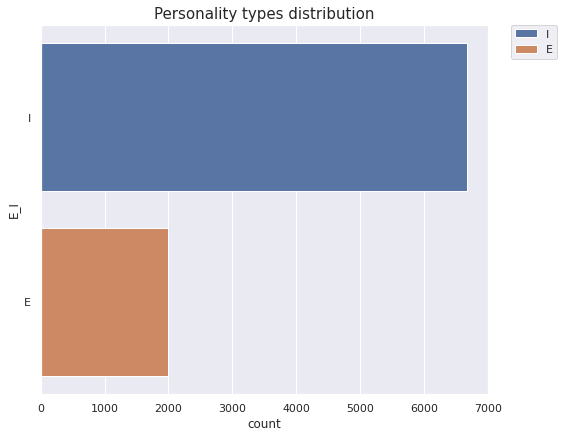

In [14]:
#sns countplot
plt.figure(figsize=(8,6))
sns.countplot(y='E_I',data=df,hue='E_I',dodge=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
sns.set_context('talk')
sns.set_theme(style="darkgrid")
plt.tight_layout()
plt.title('Personality types distribution', fontsize=15)
plt.show()

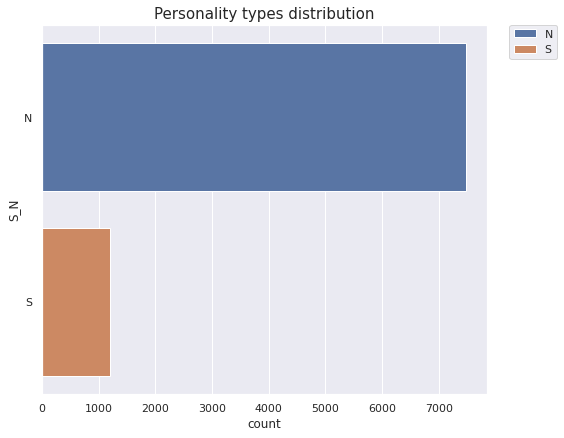

In [15]:
#sns countplot
plt.figure(figsize=(8,6))
sns.countplot(y='S_N',data=df,hue='S_N',dodge=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
sns.set_context('talk')
sns.set_theme(style="darkgrid")
plt.tight_layout()
plt.title('Personality types distribution', fontsize=15)
plt.show()

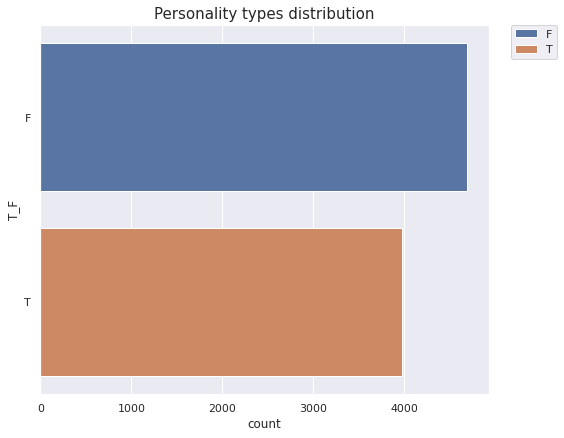

In [16]:
#sns countplot
plt.figure(figsize=(8,6))
sns.countplot(y='T_F',data=df,hue='T_F',dodge=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
sns.set_context('talk')
sns.set_theme(style="darkgrid")
plt.tight_layout()
plt.title('Personality types distribution', fontsize=15)
plt.show()

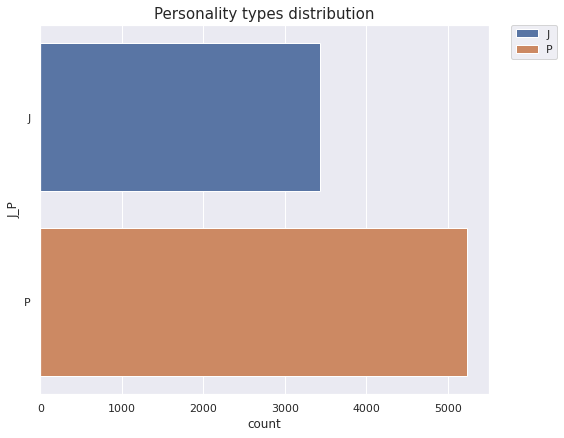

In [17]:
#sns countplot
plt.figure(figsize=(8,6))
sns.countplot(y='J_P',data=df,hue='J_P',dodge=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
sns.set_context('talk')
sns.set_theme(style="darkgrid")
plt.tight_layout()
plt.title('Personality types distribution', fontsize=15)
plt.show()